In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.svm import SVR
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Ler os dados do URL
url = 'https://hastie.su.domains/ElemStatLearn/datasets/prostate.data'
dfProstata = pd.read_csv(url, delimiter='\t')

# Filtrar as linhas onde a última coluna tem valor 'T'
dfProstata_filtrado = dfProstata[dfProstata.iloc[:, -1] == 'T']

# Remover a coluna 'Unnamed: 0'
dfProstata_filtrado = dfProstata_filtrado.drop(columns='Unnamed: 0')

# Imprimir os dados filtrados
print(dfProstata_filtrado)

# Salvar os dados filtrados em um novo arquivo CSV, se desejar
dfProstata_filtrado.to_csv('prostate_filtrado.csv', index=False)




      lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45  \
0  -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0   
1  -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0   
2  -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20   
3  -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0   
4   0.751416  3.432373   62 -1.386294    0 -1.386294        6      0   
..       ...       ...  ...       ...  ...       ...      ...    ...   
90  3.246491  4.101817   68 -1.386294    0 -1.386294        6      0   
91  2.532903  3.677566   61  1.348073    1 -1.386294        7     15   
92  2.830268  3.876396   68 -1.386294    1  1.321756        7     60   
93  3.821004  3.896909   44 -1.386294    1  2.169054        7     40   
95  2.882564  3.773910   68  1.558145    1  1.558145        7     80   

        lpsa train  
0  -0.430783     T  
1  -0.162519     T  
2  -0.162519     T  
3  -0.162519     T  
4   0.371564     T  
..       

In [3]:
dfProstata=pd.read_csv('prostate_filtrado.csv')
dfProstata

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
62,3.246491,4.101817,68,-1.386294,0,-1.386294,6,0,4.029806,T
63,2.532903,3.677566,61,1.348073,1,-1.386294,7,15,4.129551,T
64,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
65,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carregar o DataFrame com os dados filtrados
dfProstata = pd.read_csv('prostate_filtrado.csv')

# Definir as variáveis de entrada
colunas_entradas = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

# Separar as variáveis de entrada
X = dfProstata[colunas_entradas]

# Criar uma instância do StandardScaler
scaler = StandardScaler()

# Ajustar o scaler aos dados e transformar as variáveis de entrada
X_padronizado = scaler.fit_transform(X)

# O resultado é uma matriz NumPy com as variáveis padronizadas
# Você pode convertê-la de volta para um DataFrame, se desejar
X_padronizado_df = pd.DataFrame(X_padronizado, columns=colunas_entradas)

# Exibir as variáveis de entrada padronizadas
print(X_padronizado_df)


      lcavol   lweight       age      lbph       svi       lcp   gleason  \
0  -1.535180 -1.810979 -1.980425 -1.003472 -0.537086 -0.843084 -1.039499   
1  -1.871221 -0.647911 -0.906025 -1.003472 -0.537086 -0.843084 -1.039499   
2  -1.479237 -1.976330  1.242777 -1.003472 -0.537086 -0.843084  0.381857   
3  -2.041272 -0.725785 -0.906025 -1.003472 -0.537086 -0.843084 -1.039499   
4  -0.455756 -0.409561 -0.368824 -1.003472 -0.537086 -0.843084 -1.039499   
..       ...       ...       ...       ...       ...       ...       ...   
62  1.567362  1.005663  0.436976 -1.003472 -0.537086 -0.843084 -1.039499   
63  0.988753  0.108784 -0.503124  0.878806  1.861899 -0.843084  0.381857   
64  1.229869  0.529116  0.436976 -1.003472  1.861899  1.104813  0.381857   
65  2.033202  0.572482 -2.786226 -1.003472  1.861899  1.714274  0.381857   
66  1.272273  0.312458  0.436976  1.023414  1.861899  1.274848  0.381857   

       pgg45  
0  -0.903253  
1  -0.903253  
2  -0.215549  
3  -0.903253  
4  -0.903253

Coeficiente intercepto: 2.4523450850746262
Coeficientes das características: [ 0.71104059  0.29045029 -0.14148182  0.21041951  0.30730025 -0.28684075
 -0.02075686  0.27526843]
Valor do intercepto: 2.4523450850746262


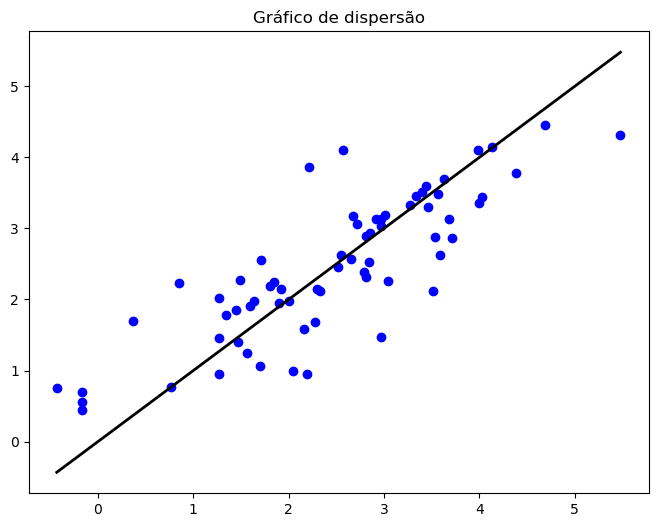

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Carregar o DataFrame com os dados filtrados
dfProstata = pd.read_csv('prostate_filtrado.csv')

# Definir a variável alvo (target) e as variáveis de entrada (entradas)
target_coluna = 'lpsa'
colunas_entradas = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

# Separar as variáveis de entrada e a variável alvo
X = dfProstata[colunas_entradas]
y = dfProstata[target_coluna]

# Padronizar as variáveis de entrada
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

# Criar uma instância do modelo de regressão linear
modelo_regressao = LinearRegression()

# Ajustar o modelo aos dados padronizados
modelo_regressao.fit(X_padronizado, y)

# Imprimir os coeficientes do modelo
print('Coeficiente intercepto:', modelo_regressao.intercept_)
print('Coeficientes das características:', modelo_regressao.coef_)

# Imprimir o valor do intercepto
print('Valor do intercepto:', modelo_regressao.intercept_)

# Plotar os valores reais vs. previsões

previsoes = modelo_regressao.predict(X_padronizado)

plt.figure(figsize=(8, 6))
plt.scatter(y, previsoes, c='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], '-', lw=2, c='black')
plt.xlabel('')
plt.ylabel('')
plt.title('Gráfico de dispersão')

plt.show()


In [6]:
from sklearn.metrics import mean_squared_error

# Fazer previsões
previsoes = modelo_regressao.predict(X_padronizado)

# Calcular o MSE
mse = mean_squared_error(y, previsoes)

# Imprimir o MSE
print('MSE:', mse)


MSE: 0.43919976805833433


In [7]:
import pandas as pd

# Carregar o DataFrame com os dados filtrados
dfProstata = pd.read_csv('prostate_filtrado.csv')

# Definir as colunas de entrada
colunas_entradas = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

# Selecionar apenas as colunas de entrada
df_entradas = dfProstata[colunas_entradas]

# Adicionar a coluna 'lweight' ao DataFrame de entrada
df_entradas['lweight'] = dfProstata['lweight']

# Adicionar a coluna 'gleason' ao DataFrame de entrada
df_entradas['gleason'] = dfProstata['gleason']

# Adicionar a coluna 'age' ao DataFrame de entrada
df_entradas['age'] = dfProstata['age']

# Adicionar a coluna 'lbph' ao DataFrame de entrada
df_entradas['lbph'] = dfProstata['lbph']

# Adicionar a coluna 'svi' ao DataFrame de entrada
df_entradas['svi'] = dfProstata['svi']

# Adicionar a coluna 'lcp' ao DataFrame de entrada
df_entradas['lcp'] = dfProstata['lcp']

# Adicionar a coluna 'pgg45' ao DataFrame de entrada
df_entradas['pgg45'] = dfProstata['pgg45']

# Calcular a matriz de correlação
matriz_correlacao = df_entradas.corr()

# Imprimir a matriz de correlação
print("Matriz de Correlação:")
print(matriz_correlacao)


Matriz de Correlação:
           lcavol   lweight       age      lbph       svi       lcp   gleason  \
lcavol   1.000000  0.300232  0.286324  0.063168  0.592949  0.692043  0.426414   
lweight  0.300232  1.000000  0.316723  0.437042  0.181054  0.156829  0.023558   
age      0.286324  0.316723  1.000000  0.287346  0.128902  0.172951  0.365915   
lbph     0.063168  0.437042  0.287346  1.000000 -0.139147 -0.088535  0.032992   
svi      0.592949  0.181054  0.128902 -0.139147  1.000000  0.671240  0.306875   
lcp      0.692043  0.156829  0.172951 -0.088535  0.671240  1.000000  0.476437   
gleason  0.426414  0.023558  0.365915  0.032992  0.306875  0.476437  1.000000   
pgg45    0.483161  0.074166  0.275806 -0.030404  0.481358  0.662533  0.757056   

            pgg45  
lcavol   0.483161  
lweight  0.074166  
age      0.275806  
lbph    -0.030404  
svi      0.481358  
lcp      0.662533  
gleason  0.757056  
pgg45    1.000000  


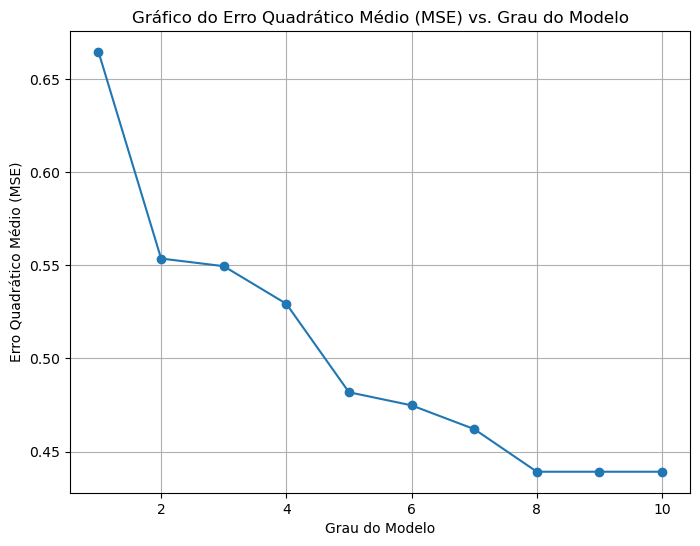

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Carregar o DataFrame com os dados filtrados
dfProstata = pd.read_csv('prostate_filtrado.csv')

# Definir a variável alvo (target) e as variáveis de entrada (entradas)
target_coluna = 'lpsa'
colunas_entradas = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

# Separar as variáveis de entrada e a variável alvo
X = dfProstata[colunas_entradas]
y = dfProstata[target_coluna]

# Padronizar as variáveis de entrada
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

# Inicializar listas para armazenar os resultados do MSE
mse = []

# Loop sobre diferentes graus de polinômios (ou complexidade do modelo)
for grau in range(1, 11):
    # Criar uma instância do modelo de regressão linear com grau de polinômio 'grau'
    modelo_regressao = LinearRegression()

    # Ajustar o modelo aos dados padronizados
    modelo_regressao.fit(X_padronizado[:, :grau], y)

    # Fazer previsões nos dados
    y_pred = modelo_regressao.predict(X_padronizado[:, :grau])

    # Calcular o MSE
    mse.append(mean_squared_error(y, y_pred))

# Plotar o gráfico do MSE
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), mse, marker='o')
plt.xlabel('Grau do Modelo')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Gráfico do Erro Quadrático Médio (MSE) vs. Grau do Modelo')
plt.grid()
plt.show()


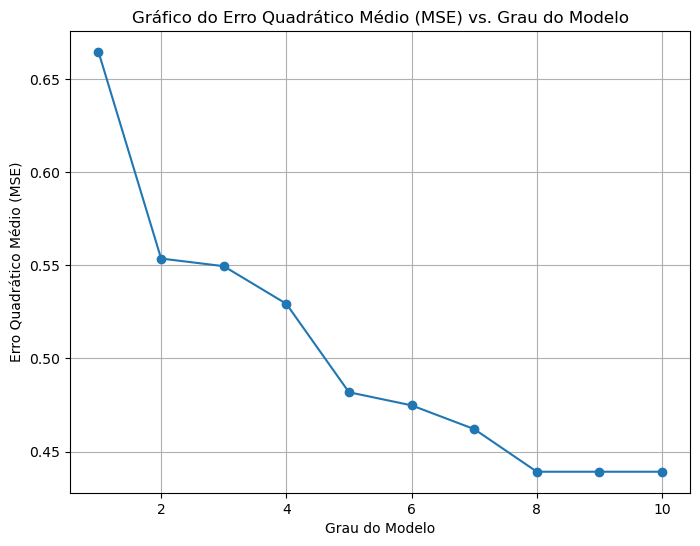

O melhor grau do modelo é 8 com MSE mínimo de 0.44


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Carregar o DataFrame com os dados filtrados
dfProstata = pd.read_csv('prostate_filtrado.csv')

# Definir a variável alvo (target) e as variáveis de entrada (entradas)
target_coluna = 'lpsa'
colunas_entradas = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

# Separar as variáveis de entrada e a variável alvo
X = dfProstata[colunas_entradas]
y = dfProstata[target_coluna]

# Padronizar as variáveis de entrada
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

# Inicializar listas para armazenar os resultados do MSE
mse = []

# Loop sobre diferentes graus de polinômios (ou complexidade do modelo)
for grau in range(1, 11):
    # Criar uma instância do modelo de regressão linear com grau de polinômio 'grau'
    modelo_regressao = LinearRegression()

    # Ajustar o modelo aos dados padronizados
    modelo_regressao.fit(X_padronizado[:, :grau], y)

    # Fazer previsões nos dados
    y_pred = modelo_regressao.predict(X_padronizado[:, :grau])

    # Calcular o MSE
    mse.append(mean_squared_error(y, y_pred))

# Encontrar o grau do modelo com o menor MSE
melhor_grau = np.argmin(mse) + 1  # +1 porque a lista de graus começa em 1

# Plotar o gráfico do MSE
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), mse, marker='o')
plt.xlabel('Grau do Modelo')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Gráfico do Erro Quadrático Médio (MSE) vs. Grau do Modelo')
plt.grid()
plt.show()

print(f"O melhor grau do modelo é {melhor_grau} com MSE mínimo de {mse[melhor_grau - 1]:.2f}")


Coeficientes: [ 0.71104059  0.29045029 -0.14148182  0.21041951  0.30730025 -0.28684075
 -0.02075686  0.27526843]
Intercepto: 2.4523450850746262
MSE para o modelo com grau 8: 0.44


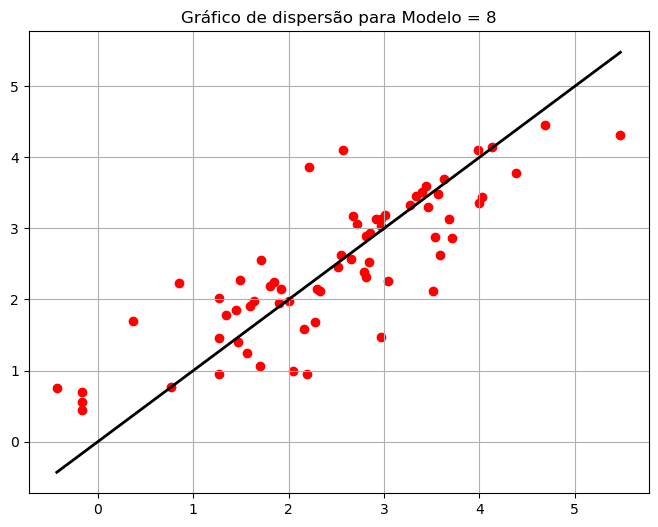

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Carregar o DataFrame com os dados filtrados
dfProstata = pd.read_csv('prostate_filtrado.csv')

# Definir a variável alvo (target) e as variáveis de entrada (entradas)
target_coluna = 'lpsa'
colunas_entradas = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

# Separar as variáveis de entrada e a variável alvo
X = dfProstata[colunas_entradas]
y = dfProstata[target_coluna]

# Padronizar as variáveis de entrada
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

# Criar uma instância do modelo de regressão linear com grau 8
grau_modelo = 8
modelo_regressao = LinearRegression()

# Ajustar o modelo aos dados padronizados
modelo_regressao.fit(X_padronizado[:, :grau_modelo], y)

# Fazer previsões nos dados
y_pred = modelo_regressao.predict(X_padronizado[:, :grau_modelo])

# Calcular o MSE para o modelo com grau 8
mse_modelo_8 = mean_squared_error(y, y_pred)

# Imprimir coeficientes e intercepto
coeficientes = modelo_regressao.coef_
intercepto = modelo_regressao.intercept_

print(f"Coeficientes: {coeficientes}")
print(f"Intercepto: {intercepto}")
print(f"MSE para o modelo com grau 8: {mse_modelo_8:.2f}")

# Plotar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, c='red')
plt.plot([min(y), max(y)], [min(y), max(y)], '-', lw=2, c='black')

plt.title('Gráfico de dispersão para Modelo = 8')

plt.grid()
plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Carregar o DataFrame com os dados filtrados
dfProstata = pd.read_csv('prostate_filtrado.csv')

# Definir a variável alvo (target) e as variáveis de entrada (entradas)
target_coluna = 'lpsa'
colunas_entradas = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

# Separar as variáveis de entrada e a variável alvo
X = dfProstata[colunas_entradas]
y = dfProstata[target_coluna]

# Padronizar as variáveis de entrada
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

# Definir o valor de lambda
lambda_valor = 0.25

# Implementar o modelo Ridge
modelo_ridge = Ridge(alpha=lambda_valor)
modelo_ridge.fit(X_padronizado, y)

# Implementar o modelo Lasso
modelo_lasso = Lasso(alpha=lambda_valor)
modelo_lasso.fit(X_padronizado, y)

# Calcular as previsões para Ridge e Lasso
y_pred_ridge = modelo_ridge.predict(X_padronizado)
y_pred_lasso = modelo_lasso.predict(X_padronizado)

# Calcular o MSE para Ridge e Lasso
mse_ridge = mean_squared_error(y, y_pred_ridge)
mse_lasso = mean_squared_error(y, y_pred_lasso)

# Imprimir os resultados
print(f"Resultados para Ridge (lambda = {lambda_valor}):")
print(f"Coeficientes Ridge: {modelo_ridge.coef_}")
print(f"Intercepto Ridge: {modelo_ridge.intercept_}")
print(f"MSE para Ridge: {mse_ridge:.2f}")

print("\nResultados para Lasso:")
print(f"Coeficientes Lasso: {modelo_lasso.coef_}")
print(f"Intercepto Lasso: {modelo_lasso.intercept_}")
print(f"MSE para Lasso: {mse_lasso:.2f}")


Resultados para Ridge (lambda = 0.25):
Coeficientes Ridge: [ 0.70434465  0.29026491 -0.13964242  0.20992007  0.30583538 -0.27831864
 -0.01818066  0.27009569]
Intercepto Ridge: 2.4523450850746262
MSE para Ridge: 0.44

Resultados para Lasso:
Coeficientes Lasso: [0.54140921 0.15677364 0.         0.         0.06816303 0.
 0.         0.        ]
Intercepto Lasso: 2.4523450850746267
MSE para Lasso: 0.63


In [12]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Carregar o DataFrame com os dados filtrados
dfProstata = pd.read_csv('prostate_filtrado.csv')

# Definir a variável alvo (target) e as variáveis de entrada (entradas)
target_coluna = 'lpsa'
colunas_entradas = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

# Separar as variáveis de entrada e a variável alvo
X = dfProstata[colunas_entradas]
y = dfProstata[target_coluna]

# Padronizar as variáveis de entrada
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

# Definir o valor de lambda
lambda_valor = 0.25

# Implementar o modelo Ridge
modelo_ridge = Ridge(alpha=lambda_valor)
modelo_ridge.fit(X_padronizado, y)

# Implementar o modelo Lasso
modelo_lasso = Lasso(alpha=lambda_valor)
modelo_lasso.fit(X_padronizado, y)

# Calcular as previsões para Ridge e Lasso
y_pred_ridge = modelo_ridge.predict(X_padronizado)
y_pred_lasso = modelo_lasso.predict(X_padronizado)

# Calcular o MSE para Ridge e Lasso
mse_ridge = mean_squared_error(y, y_pred_ridge)
mse_lasso = mean_squared_error(y, y_pred_lasso)

# Imprimir os resultados
print(f"Resultados para Ridge (lambda = {lambda_valor}):")
print(f"Coeficientes Ridge: {modelo_ridge.coef_}")
print(f"Intercepto Ridge: {modelo_ridge.intercept_}")
print(f"MSE para Ridge: {mse_ridge:.2f}")

print("\nResultados para Lasso:")
print(f"Coeficientes Lasso: {modelo_lasso.coef_}")
print(f"Intercepto Lasso: {modelo_lasso.intercept_}")
print(f"MSE para Lasso: {mse_lasso:.2f}")


Resultados para Ridge (lambda = 0.25):
Coeficientes Ridge: [ 0.70434465  0.29026491 -0.13964242  0.20992007  0.30583538 -0.27831864
 -0.01818066  0.27009569]
Intercepto Ridge: 2.4523450850746262
MSE para Ridge: 0.44

Resultados para Lasso:
Coeficientes Lasso: [0.54140921 0.15677364 0.         0.         0.06816303 0.
 0.         0.        ]
Intercepto Lasso: 2.4523450850746267
MSE para Lasso: 0.63


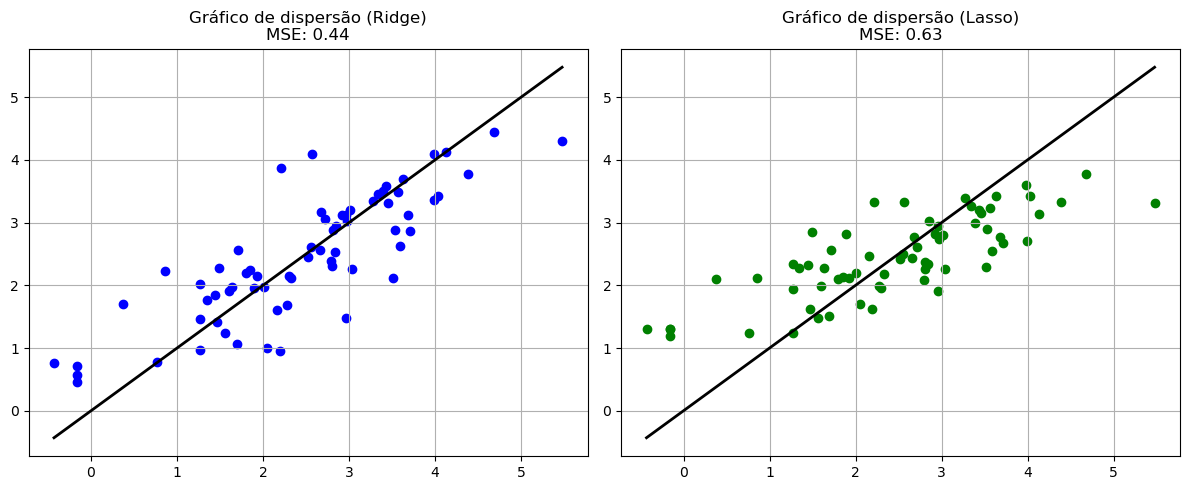

In [13]:
# Plotar gráfico de dispersão para Ridge
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_ridge, c='blue', label='Valores Reais vs. Previsões (Ridge)')
plt.plot([min(y), max(y)], [min(y), max(y)], '-', lw=2, c='black',label='Linha de Referência')

plt.title(f'Gráfico de dispersão (Ridge)\nMSE: {mse_ridge:.2f}')

plt.grid()

# Plotar gráfico de dispersão para Lasso
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred_lasso, c='green', label='Valores Reais vs. Previsões (Lasso)')
plt.plot([min(y), max(y)], [min(y), max(y)], '-', lw=2, c='black', label='Linha de Referência')

plt.title(f'Gráfico de dispersão (Lasso)\nMSE: {mse_lasso:.2f}')

plt.grid()

plt.tight_layout()
plt.show()

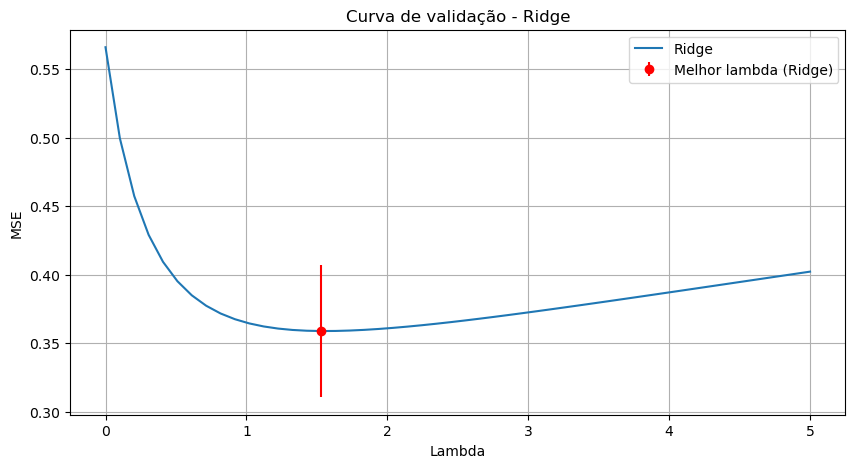

Best Lambda for Ridge: 1.5306122448979593


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Carregar o DataFrame com os dados filtrados
dfProstata = pd.read_csv('prostate_filtrado.csv')

# Separar os atributos (entradas) e o alvo (target)
X = dfProstata[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
y = dfProstata['lpsa']

# Dividir os dados em treinamento (70%) e validação (30%)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.73, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_validation_std = scaler.transform(X_validation)

# Defina os valores de lambda que você deseja testar
lambda_values = np.linspace(0, 5, 50)

# Listas para armazenar os resultados do erro de validação
validation_scores_ridge = []

# Loop através dos valores de lambda
for lambda_val in lambda_values:
    # Treine e valide o modelo Ridge com lambda_val usando validação cruzada k-fold
    ridge_model = Ridge(alpha=lambda_val)
    ridge_scores = -cross_val_score(ridge_model, X_train_std, y_train, cv= 10, scoring='neg_mean_squared_error')
    validation_scores_ridge.append(ridge_scores.mean())

# Encontre o valor de lambda que resulta no MSE mínimo
best_lambda_ridge = lambda_values[np.argmin(validation_scores_ridge)]

# Treine o modelo Ridge com o melhor lambda
final_ridge_model = Ridge(alpha=best_lambda_ridge)
final_ridge_model.fit(X_train_std, y_train)

# Calcule o MSE no conjunto de validação
validation_mse = -cross_val_score(final_ridge_model, X_validation_std, y_validation, cv=3, scoring='neg_mean_squared_error')

# Calcule o desvio padrão do MSE no conjunto de validação
std_validation_mse = np.std(validation_mse)

# Plote a curva de validação para Ridge com barra de erro
plt.figure(figsize=(10, 5))
plt.plot(lambda_values, validation_scores_ridge, label='Ridge')
plt.errorbar(best_lambda_ridge, np.min(validation_scores_ridge), yerr=std_validation_mse,
             fmt='o', color='red', label='Melhor lambda (Ridge)')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Curva de validação - Ridge')
plt.legend()
plt.grid()
plt.show()

print(f'Best Lambda for Ridge: {best_lambda_ridge}')


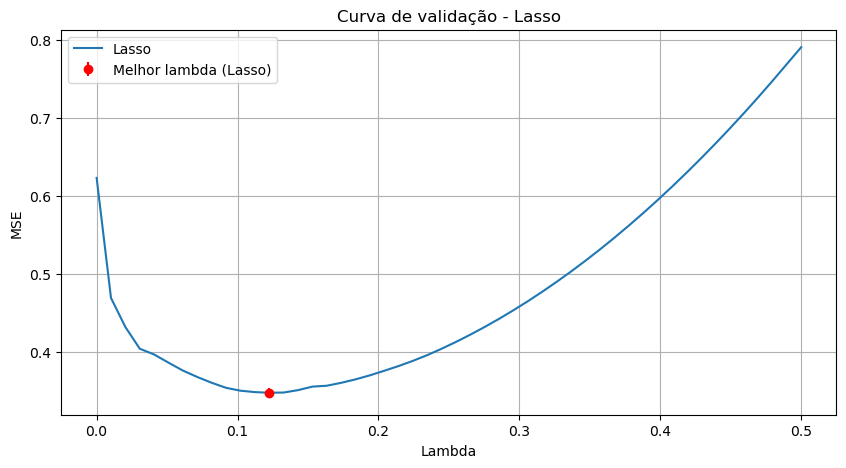

Best Lambda for Ridge: 1.5306122448979593
Best Lambda for Lasso: 0.12244897959183673


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Carregar o DataFrame com os dados filtrados
dfProstata = pd.read_csv('prostate_filtrado.csv')

# Separar os atributos (entradas) e o alvo (target)
X = dfProstata[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
y = dfProstata['lpsa']

# Dividir os dados em treinamento (70%) e validação (30%)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.75, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_validation_std = scaler.transform(X_validation)

# Defina os valores de lambda que você deseja testar
lambda_values = np.linspace(0, 0.5, 50)

# Listas para armazenar os resultados do erro de validação
validation_scores_lasso = []

# Loop através dos valores de lambda
for lambda_val in lambda_values:
    # Treine e valide o modelo Lasso com lambda_val usando validação cruzada k-fold
    lasso_model = Lasso(alpha=lambda_val)
    lasso_scores = -cross_val_score(lasso_model, X_train_std, y_train, cv=10, scoring='neg_mean_squared_error')
    validation_scores_lasso.append(lasso_scores.mean())

# Encontre o valor de lambda que resulta no MSE mínimo
best_lambda_lasso = lambda_values[np.argmin(validation_scores_lasso)]

# Treine o modelo Lasso com o melhor lambda
final_lasso_model = Lasso(alpha=best_lambda_lasso)
final_lasso_model.fit(X_train_std, y_train)

# Calcule o MSE no conjunto de validação
validation_mse = -cross_val_score(final_lasso_model, X_validation_std, y_validation, cv=3, scoring='neg_mean_squared_error')

# Calcule o desvio padrão do MSE no conjunto de validação
std_validation_mse = np.std(validation_mse)

# Plote a curva de validação para Lasso com barra de erro
plt.figure(figsize=(10, 5))
plt.plot(lambda_values, validation_scores_lasso, label='Lasso')
plt.errorbar(best_lambda_lasso, np.min(validation_scores_lasso), yerr=std_validation_mse,
             fmt='o', color='red', label='Melhor lambda (Lasso)')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Curva de validação - Lasso')
plt.legend()
plt.grid()
plt.show()

print(f'Best Lambda for Ridge: {best_lambda_ridge}')
print(f'Best Lambda for Lasso: {best_lambda_lasso}')


In [17]:
# Calcular o score mínimo para Ridge
min_validation_score_ridge = min(validation_scores_ridge)

# Calcular o desvio padrão do score mínimo
std_min_validation_score_ridge = np.std(validation_scores_ridge)

# Imprimir o score mínimo e seu desvio padrão
print(f'Score Mínimo (Ridge): {min_validation_score_ridge}')
print(f'Desvio Padrão do Score Mínimo (Ridge): {std_min_validation_score_ridge}')


Score Mínimo (Ridge): 0.3588743091813288
Desvio Padrão do Score Mínimo (Ridge): 0.03622808784550039


In [18]:
# Calcular o score mínimo para Lasso
min_validation_score_lasso = min(validation_scores_lasso)

# Calcular o desvio padrão do score mínimo
std_min_validation_score_lasso = np.std(validation_scores_lasso)

# Imprimir o score mínimo e seu desvio padrão
print(f'Score Mínimo (Lasso): {min_validation_score_lasso}')
print(f'Desvio Padrão do Score Mínimo (Lasso): {std_min_validation_score_lasso}')


Score Mínimo (Lasso): 0.3482769323914226
Desvio Padrão do Score Mínimo (Lasso): 0.13061690172909193


Best Lambda for Ridge (Minimum MSE): 1.5306122448979593
Best Lambda for Ridge (Within 1 Standard Deviation): 1.5306122448979593


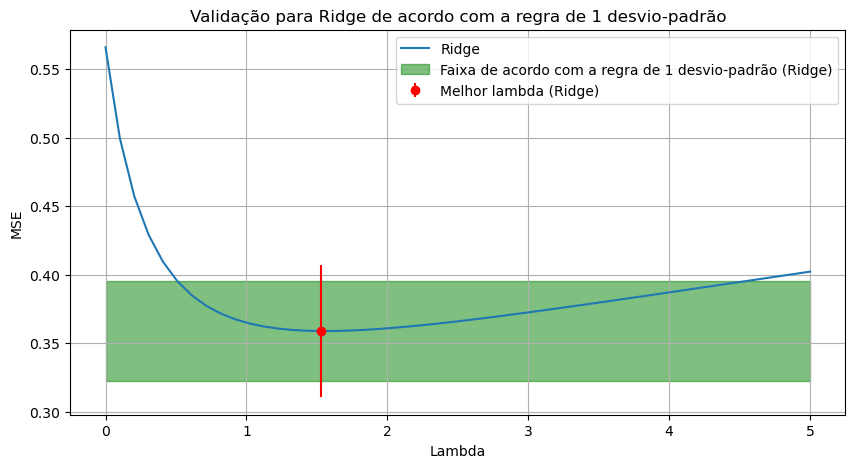

In [19]:
# Calcular a média e o desvio padrão dos erros de validação
mean_validation_scores_ridge = np.array(validation_scores_ridge)
std_validation_scores_ridge = np.std(mean_validation_scores_ridge)

# Encontrar o índice onde o MSE é mínimo
min_mse_index = np.argmin(mean_validation_scores_ridge)

# Encontrar o valor de lambda correspondente ao mínimo MSE
best_lambda_ridge = lambda_values[min_mse_index]

# Encontrar o valor de lambda dentro de "1 desvio padrão" do mínimo MSE
lambda_within_std = []

for i in range(len(lambda_values)):
    if mean_validation_scores_ridge[i] <= mean_validation_scores_ridge[min_mse_index] + std_validation_scores_ridge:
        lambda_within_std.append(lambda_values[i])

# Escolher o valor de lambda dentro de "1 desvio padrão" mais próximo do mínimo MSE
best_lambda_within_std = min(lambda_within_std, key=lambda x: abs(x - best_lambda_ridge))

print(f'Best Lambda for Ridge (Minimum MSE): {best_lambda_ridge}')
print(f'Best Lambda for Ridge (Within 1 Standard Deviation): {best_lambda_within_std}')


plt.figure(figsize=(10, 5))
plt.plot(lambda_values, validation_scores_ridge, label='Ridge')
plt.errorbar(best_lambda_ridge, np.min(validation_scores_ridge), yerr=std_validation_mse,
             fmt='o', color='red', label='Melhor lambda (Ridge)')
plt.fill_between(lambda_values, np.min(validation_scores_ridge) - std_validation_scores_ridge,
                 np.min(validation_scores_ridge) + std_validation_scores_ridge, color='green', alpha=0.5,
                 label='Faixa de acordo com a regra de 1 desvio-padrão (Ridge)')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Validação para Ridge de acordo com a regra de 1 desvio-padrão')
plt.legend()
plt.grid()
plt.show()




In [ ]:
print(f'Desvio Padrão dos Erros de Validação para Ridge: {std_validation_scores_ridge}')


Desvio Padrão dos Erros de Validação para Ridge: 0.03622808784550048


Best Lambda for Lasso (Minimum MSE): 1.2244897959183674
Best Lambda for Lasso (Within 1 Standard Deviation): 1.2244897959183674


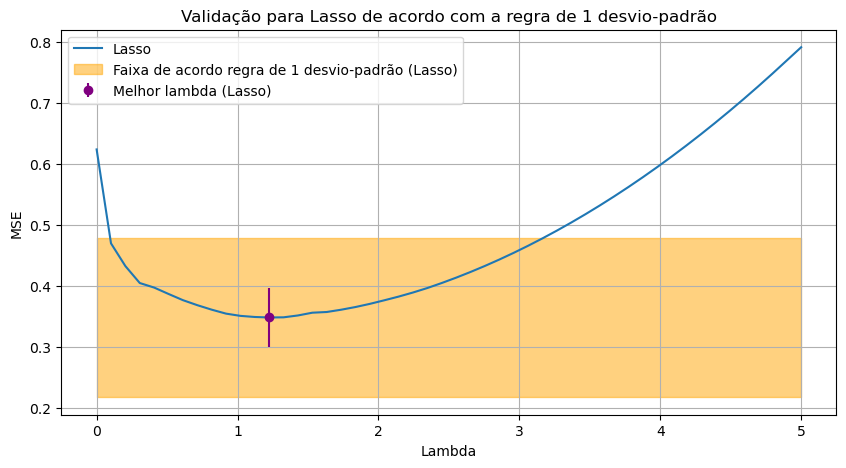

In [20]:
# Calcular a média e o desvio padrão dos erros de validação para Lasso
mean_validation_scores_lasso = np.array(validation_scores_lasso)
std_validation_scores_lasso = np.std(mean_validation_scores_lasso)

# Encontrar o índice onde o MSE é mínimo para Lasso
min_mse_index_lasso = np.argmin(mean_validation_scores_lasso)

# Encontrar o valor de lambda correspondente ao mínimo MSE para Lasso
best_lambda_lasso = lambda_values[min_mse_index_lasso]

# Encontrar o valor de lambda dentro de "1 desvio padrão" do mínimo MSE para Lasso
lambda_within_std_lasso = []

for i in range(len(lambda_values)):
    if mean_validation_scores_lasso[i] <= mean_validation_scores_lasso[min_mse_index_lasso] + std_validation_scores_lasso:
        lambda_within_std_lasso.append(lambda_values[i])

# Escolher o valor de lambda dentro de "1 desvio padrão" mais próximo do mínimo MSE para Lasso
best_lambda_within_std_lasso = min(lambda_within_std_lasso, key=lambda x: abs(x - best_lambda_lasso))

print(f'Best Lambda for Lasso (Minimum MSE): {best_lambda_lasso}')
print(f'Best Lambda for Lasso (Within 1 Standard Deviation): {best_lambda_within_std_lasso}')


plt.figure(figsize=(10, 5))
plt.plot(lambda_values, validation_scores_lasso, label='Lasso')
plt.errorbar(best_lambda_lasso, np.min(validation_scores_lasso), yerr=std_validation_mse,
             fmt='o', color='purple', label='Melhor lambda (Lasso)')
plt.fill_between(lambda_values, np.min(validation_scores_lasso) - std_validation_scores_lasso,
                 np.min(validation_scores_lasso) + std_validation_scores_lasso, color='orange', alpha=0.5,
                 label='Faixa de acordo regra de 1 desvio-padrão (Lasso)')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Validação para Lasso de acordo com a regra de 1 desvio-padrão')
plt.legend()
plt.grid()
plt.show()


In [23]:
from sklearn.linear_model import Ridge, Lasso
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carregar o DataFrame com os dados filtrados
dfProstata = pd.read_csv('prostate_filtrado.csv')

# Separar os atributos (entradas) e o alvo (target)
X = dfProstata[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
y = dfProstata['lpsa']

# Padronizar os dados
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Melhor valor de λ encontrado para Ridge
best_lambda_ridge = 0.1530612244897959

# Treinar o modelo Ridge com todos os dados
ridge_model = Ridge(alpha=best_lambda_ridge)
ridge_model.fit(X_std, y)

# Melhor valor de λ encontrado para Lasso
best_lambda_lasso = 0.12244897959183673

# Treinar o modelo Lasso com todos os dados
lasso_model = Lasso(alpha=best_lambda_lasso)
lasso_model.fit(X_std, y)

# Avaliar os modelos com métricas de desempenho (por exemplo, R²)
ridge_r_squared = ridge_model.score(X_std, y)
lasso_r_squared = lasso_model.score(X_std, y)

print(f'R² para Ridge com λ={best_lambda_ridge}: {ridge_r_squared}')
print(f'R² para Lasso com λ={best_lambda_lasso}: {lasso_r_squared}')


R² para Ridge com λ=0.1530612244897959: 0.6943619175831537
R² para Lasso com λ=0.12244897959183673: 0.6382516987578413


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Carregar o DataFrame com os dados filtrados
dfProstata = pd.read_csv('prostate_filtrado.csv')

# Separar os atributos (entradas) e o alvo (target)
X = dfProstata[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
y = dfProstata['lpsa']

# Padronizar os dados
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Melhor valor de λ encontrado para Ridge
best_lambda_ridge = 0.1530612244897959

# Treinar o modelo Ridge com todos os dados
ridge_model = Ridge(alpha=best_lambda_ridge)
ridge_model.fit(X_std, y)

# Melhor valor de λ encontrado para Lasso
best_lambda_lasso = 0.12244897959183673

# Treinar o modelo Lasso com todos os dados
lasso_model = Lasso(alpha=best_lambda_lasso)
lasso_model.fit(X_std, y)

# Realizar validação cruzada para calcular R²
ridge_r_squared_scores = cross_val_score(ridge_model, X_std, y, cv=5, scoring='r2')
lasso_r_squared_scores = cross_val_score(lasso_model, X_std, y, cv=5, scoring='r2')

# Calcular o desvio padrão dos R²
ridge_r_squared_std = np.std(ridge_r_squared_scores)
lasso_r_squared_std = np.std(lasso_r_squared_scores)

print(f'Desvio Padrão de R² para Ridge: {ridge_r_squared_std:.4f}')
print(f'Desvio Padrão de R² para Lasso: {lasso_r_squared_std:.4f}')


Desvio Padrão de R² para Ridge: 4.9560
Desvio Padrão de R² para Lasso: 2.1045


Coeficientes do modelo Ridge:
[ 0.70610133  0.29031608 -0.14012739  0.21005279  0.30622091 -0.28054895
 -0.01885009  0.27144348]

Coeficientes do modelo Lasso:
[ 0.56560543  0.21228804 -0.          0.06464889  0.14096517  0.
  0.          0.03933446]


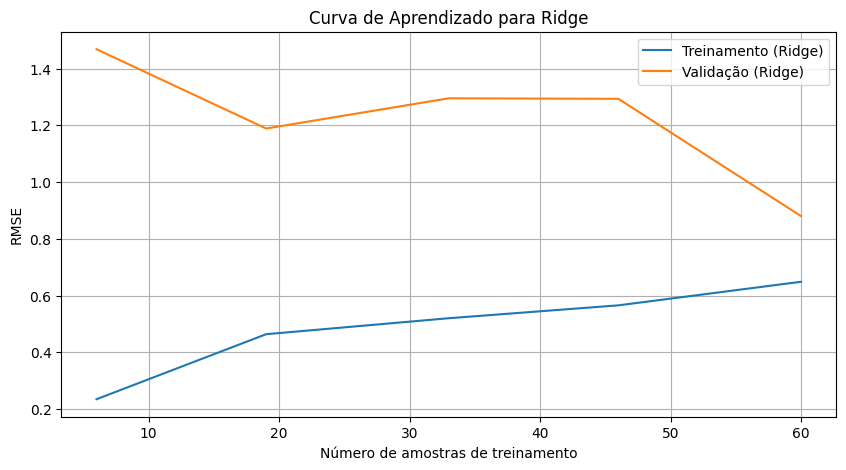

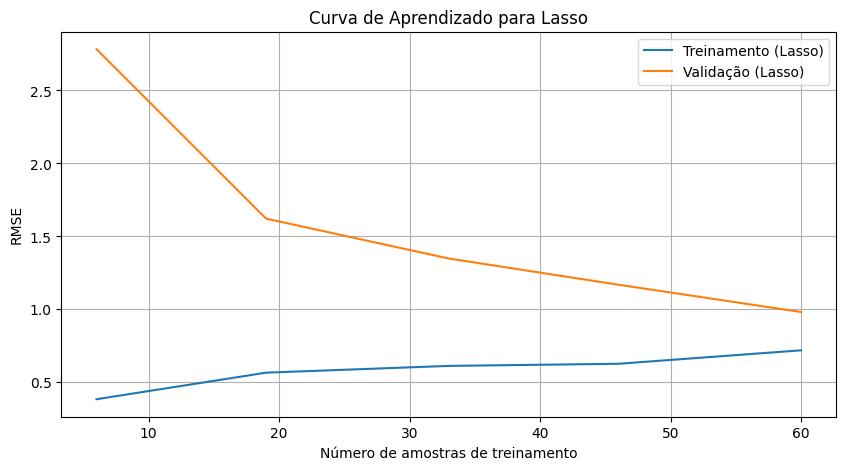

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Carregar o DataFrame com os dados filtrados
dfProstata = pd.read_csv('prostate_filtrado.csv')

# Separar os atributos (entradas) e o alvo (target)
X = dfProstata[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
y = dfProstata['lpsa']

# Padronizar os dados
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Melhor valor de λ encontrado para Ridge
best_lambda_ridge = 0.18367346938775508 # Substitua pelo valor correto encontrado anteriormente

# Treinar o modelo Ridge com todos os dados
ridge_model = Ridge(alpha=best_lambda_ridge)
ridge_model.fit(X_std, y)

# Melhor valor de λ encontrado para Lasso
best_lambda_lasso = 0.14285714285714285   # Substitua pelo valor correto encontrado anteriormente

# Treinar o modelo Lasso com todos os dados
lasso_model = Lasso(alpha=best_lambda_lasso)
lasso_model.fit(X_std, y)

# Imprimir os coeficientes dos modelos
print("Coeficientes do modelo Ridge:")
print(ridge_model.coef_)

print("\nCoeficientes do modelo Lasso:")
print(lasso_model.coef_)

# Plotar as curvas de aprendizado para Ridge
train_sizes_ridge, train_scores_ridge, test_scores_ridge = learning_curve(
    ridge_model, X_std, y, cv=10, scoring='neg_mean_squared_error')

train_rmse_ridge = np.sqrt(-train_scores_ridge.mean(axis=1))
test_rmse_ridge = np.sqrt(-test_scores_ridge.mean(axis=1))

plt.figure(figsize=(10, 5))
plt.plot(train_sizes_ridge, train_rmse_ridge, label='Treinamento (Ridge)')
plt.plot(train_sizes_ridge, test_rmse_ridge, label='Validação (Ridge)')
plt.xlabel('Número de amostras de treinamento')
plt.ylabel('RMSE')
plt.title('Curva de Aprendizado para Ridge')
plt.legend()
plt.grid()

# Plotar as curvas de aprendizado para Lasso
train_sizes_lasso, train_scores_lasso, test_scores_lasso = learning_curve(
    lasso_model, X_std, y, cv=10, scoring='neg_mean_squared_error')

train_rmse_lasso = np.sqrt(-train_scores_lasso.mean(axis=1))
test_rmse_lasso = np.sqrt(-test_scores_lasso.mean(axis=1))

plt.figure(figsize=(10, 5))
plt.plot(train_sizes_lasso, train_rmse_lasso, label='Treinamento (Lasso)')
plt.plot(train_sizes_lasso, test_rmse_lasso, label='Validação (Lasso)')
plt.xlabel('Número de amostras de treinamento')
plt.ylabel('RMSE')
plt.title('Curva de Aprendizado para Lasso')
plt.legend()
plt.grid()

plt.show()


LETRA F


In [ ]:
import pandas as pd

# Ler os dados do URL
url = 'https://hastie.su.domains/ElemStatLearn/datasets/prostate.data'
dfProstata = pd.read_csv(url, delimiter='\t')

# Filtrar as linhas onde a última coluna tem valor 'F'
dfProstata_filtrado = dfProstata[dfProstata.iloc[:, -1] == 'F']

# Imprimir os dados filtrados
print(dfProstata_filtrado)


    Unnamed: 0    lcavol   lweight  age      lbph  svi       lcp  gleason  \
6            7  0.737164  3.473518   64  0.615186    0 -1.386294        6   
8            9 -0.776529  3.539509   47 -1.386294    0 -1.386294        6   
9           10  0.223144  3.244544   63 -1.386294    0 -1.386294        6   
14          15  1.205971  3.442019   57 -1.386294    0 -0.430783        7   
21          22  2.059239  3.501043   60  1.474763    0  1.348073        7   
24          25  0.385262  3.667400   69  1.599388    0 -1.386294        6   
25          26  1.446919  3.124565   68  0.300105    0 -1.386294        6   
27          28 -0.400478  3.865979   67  1.816452    0 -1.386294        7   
31          32  0.182322  3.804438   65  1.704748    0 -1.386294        6   
33          34  0.009950  3.267666   54 -1.386294    0 -1.386294        6   
35          36  1.308333  4.119850   64  2.171337    0 -1.386294        7   
41          42  1.442202  3.682610   68 -1.386294    0 -1.386294        7   

In [ ]:
import pandas as pd

# Ler os dados do URL
url = 'https://hastie.su.domains/ElemStatLearn/datasets/prostate.data'
dfProstata = pd.read_csv(url, delimiter='\t')

# Filtrar as linhas onde a última coluna tem valor 'F'
filtradoF = dfProstata[dfProstata.iloc[:, -1] == 'F']

# Remover a coluna "Unnamed: 0"
filtradoF = filtradoF.drop(columns='Unnamed: 0')

# Salvar os dados filtrados em um novo arquivo CSV
filtradoF.to_csv('prostate_filtradoF.csv', index=False)

# Imprimir os dados filtrados
print(filtradoF)


      lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45  \
6   0.737164  3.473518   64  0.615186    0 -1.386294        6      0   
8  -0.776529  3.539509   47 -1.386294    0 -1.386294        6      0   
9   0.223144  3.244544   63 -1.386294    0 -1.386294        6      0   
14  1.205971  3.442019   57 -1.386294    0 -0.430783        7      5   
21  2.059239  3.501043   60  1.474763    0  1.348073        7     20   
24  0.385262  3.667400   69  1.599388    0 -1.386294        6      0   
25  1.446919  3.124565   68  0.300105    0 -1.386294        6      0   
27 -0.400478  3.865979   67  1.816452    0 -1.386294        7     20   
31  0.182322  3.804438   65  1.704748    0 -1.386294        6      0   
33  0.009950  3.267666   54 -1.386294    0 -1.386294        6      0   
35  1.308333  4.119850   64  2.171337    0 -1.386294        7      5   
41  1.442202  3.682610   68 -1.386294    0 -1.386294        7     10   
43  1.771557  3.896909   61 -1.386294    0  0.810930        7   

In [ ]:

dfProstata=pd.read_csv('prostate_filtradoF.csv')
dfProstata


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468,F
1,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319,F
2,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319,F
3,1.205971,3.442019,57,-1.386294,0,-0.430783,7,5,1.398717,F
4,2.059239,3.501043,60,1.474763,0,1.348073,7,20,1.658228,F
5,0.385262,3.667400,69,1.599388,0,-1.386294,6,0,1.731656,F
6,1.446919,3.124565,68,0.300105,0,-1.386294,6,0,1.766442,F
7,-0.400478,3.865979,67,1.816452,0,-1.386294,7,20,1.816452,F
8,0.182322,3.804438,65,1.704748,0,-1.386294,6,0,2.008214,F
9,0.009950,3.267666,54,-1.386294,0,-1.386294,6,0,2.021548,F


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carregar o DataFrame com os dados filtrados
dfProstata = pd.read_csv('prostate_filtradoF.csv')

# Definir as variáveis de entrada
colunas_entradas = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

# Separar as variáveis de entrada
X = dfProstata[colunas_entradas]

# Criar uma instância do StandardScaler
scaler = StandardScaler()

# Ajustar o scaler aos dados e transformar as variáveis de entrada
X_padronizado = scaler.fit_transform(X)

# O resultado é uma matriz NumPy com as variáveis padronizadas
# Você pode convertê-la de volta para um DataFrame, se desejar
X_padronizado_df = pd.DataFrame(X_padronizado, columns=colunas_entradas)

# Exibir as variáveis de entrada padronizadas
print(X_padronizado_df)

      lcavol   lweight       age      lbph  svi       lcp   gleason     pgg45
0  -0.681310 -0.546737  0.303246  0.317077 -0.5 -0.924523 -1.069045 -0.802904
1  -2.166462 -0.323687 -2.151601 -1.092409 -0.5 -0.924523 -1.069045 -0.802904
2  -1.185638 -1.320671  0.158843 -1.092409 -0.5 -0.924523 -1.069045 -0.802904
3  -0.221342 -0.653204 -0.707574 -1.092409 -0.5 -0.236915  0.267261 -0.603837
4   0.615838 -0.453702 -0.274365  0.922410 -0.5  1.043191  0.267261 -0.006636
5  -1.026576  0.108586  1.025260  1.010173 -0.5 -0.924523 -1.069045 -0.802904
6   0.015063 -1.726201  0.880857  0.095190 -0.5 -0.924523 -1.069045 -0.802904
7  -1.797501  0.779784  0.736454  1.163035 -0.5 -0.924523  0.267261 -0.006636
8  -1.225691  0.571775  0.447649  1.084370 -0.5 -0.924523 -1.069045 -0.802904
9  -1.394812 -1.242518 -1.140782 -1.092409 -0.5 -0.924523 -1.069045 -0.802904
10 -0.120910  1.637871  0.303246  1.412952 -0.5 -0.924523  0.267261 -0.603837
11  0.010435  0.159996  0.880857 -1.092409 -0.5 -0.924523  0.267

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Carregar o DataFrame com os dados de teste (prostate_filtradoF.csv)
dfTeste = pd.read_csv('prostate_filtradoF.csv')

# Separar os atributos (entradas) e o alvo (target) dos dados de teste
X_teste = dfTeste[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
y_teste = dfTeste['lpsa']

# Padronizar os dados de teste usando o mesmo scaler usado nos dados de treinamento
X_teste_std = scaler.transform(X_teste)

# Criar modelos Ridge e Lasso com os melhores valores de λ
ridge_model = Ridge(alpha=best_lambda_ridge)
lasso_model = Lasso(alpha=best_lambda_lasso)

# Treinar os modelos com os dados de teste
ridge_model.fit(X_teste_std, y_teste)
lasso_model.fit(X_teste_std, y_teste)

# Realizar previsões nos dados de teste
previsoes_ridge = ridge_model.predict(X_teste_std)
previsoes_lasso = lasso_model.predict(X_teste_std)

# Calcular o erro de predição quadrático médio (MSE) para cada modelo
mse_ridge = mean_squared_error(y_teste, previsoes_ridge)
mse_lasso = mean_squared_error(y_teste, previsoes_lasso)

# Imprimir o MSE para cada modelo
print(f'MSE para Ridge: {mse_ridge}')
print(f'MSE para Lasso: {mse_lasso}')


MSE para Ridge: 0.3231996421134671
MSE para Lasso: 0.3729181259106822


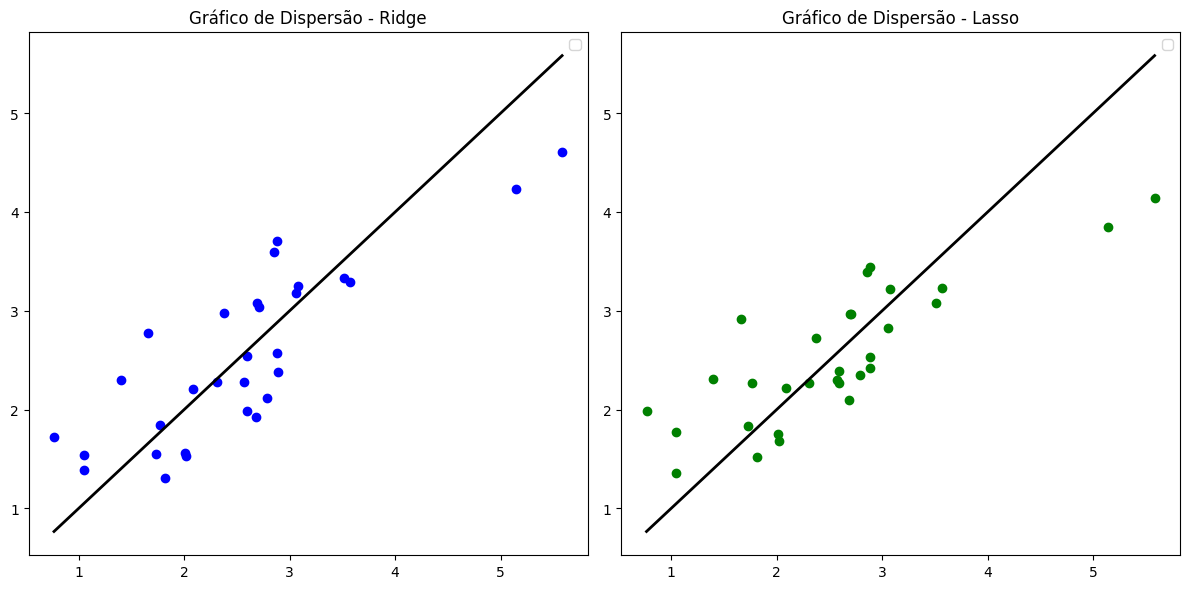

In [ ]:
import matplotlib.pyplot as plt

# Criar uma figura para os gráficos
plt.figure(figsize=(12, 6))

# Gráfico para Ridge
plt.subplot(1, 2, 1)
plt.scatter(y_teste, previsoes_ridge, c='blue')
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], '-', lw=2, c='black')

plt.title('Gráfico de Dispersão - Ridge')
plt.legend()

# Gráfico para Lasso
plt.subplot(1, 2, 2)
plt.scatter(y_teste, previsoes_lasso, c='green')
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], '-', lw=2, c='black')

plt.title('Gráfico de Dispersão - Lasso')
plt.legend()

# Mostrar os gráficos
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Coeficientes do modelo Ridge
coeficientes_ridge = ridge_model.coef_
intercepto_ridge = ridge_model.intercept_
mse_ridge = mean_squared_error(y_teste, previsoes_ridge)

print("Modelo Ridge:")
print(f"Coeficientes: {coeficientes_ridge}")
print(f"Intercepto: {intercepto_ridge}")
print(f"MSE: {mse_ridge}")

# Coeficientes do modelo Lasso
coeficientes_lasso = lasso_model.coef_
intercepto_lasso = lasso_model.intercept_
mse_lasso = mean_squared_error(y_teste, previsoes_lasso)

print("\nModelo Lasso:")
print(f"Coeficientes: {coeficientes_lasso}")
print(f"Intercepto: {intercepto_lasso}")
print(f"MSE: {mse_lasso}")


Modelo Ridge:
Coeficientes: [ 0.46083965  0.16291644 -0.06049845 -0.11487751  0.26243087  0.23704707
 -0.01141195  0.01696037]
Intercepto: 2.5365468833333336
MSE: 0.3231996421134671

Modelo Lasso:
Coeficientes: [ 0.41748456  0.         -0.         -0.          0.1674072   0.2015806
  0.          0.        ]
Intercepto: 2.5365468833333336
MSE: 0.3729181259106822


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Ler os dados do arquivo CSV
dfProstata = pd.read_csv('prostate_filtrado.csv')

# Separar os atributos (entradas) e o alvo (target)
X = dfProstata[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
y = dfProstata['lpsa']

# Ajustar o modelo linear aos dados originais
modelo_original = LinearRegression()
modelo_original.fit(X, y)

# Calcular os resíduos
residuos = y - modelo_original.predict(X)

# Número de amostras bootstrap
n_bootstrap_samples = 1000

# Inicializar uma matriz para armazenar os coeficientes estimados de cada amostra bootstrap
coeficientes_bootstrap = np.zeros((n_bootstrap_samples, len(X.columns)))

# Realizar o procedimento de bootstrap
for i in range(n_bootstrap_samples):
    # Amostrar com substituição a partir dos resíduos originais
    resample_residuals = np.random.choice(residuos, len(residuos), replace=True)

    # Ajustar o modelo linear à amostra bootstrap
    X_bootstrap = X.copy()
    y_bootstrap = modelo_original.predict(X) + resample_residuals
    modelo_bootstrap = LinearRegression()
    modelo_bootstrap.fit(X_bootstrap, y_bootstrap)

    # Armazenar os coeficientes estimados
    coeficientes_bootstrap[i, :] = modelo_bootstrap.coef_

# Calcular o desvio padrão dos coeficientes estimados das amostras bootstrap
std_coeficientes_bootstrap = np.std(coeficientes_bootstrap, axis=0)

print('Desvio Padrão dos Coeficientes do Bootstrap:')
for i, col in enumerate(X.columns):
    print(f'{col}: {std_coeficientes_bootstrap[i]:.4f}')


Desvio Padrão dos Coeficientes do Bootstrap:
lcavol: 0.0999
lweight: 0.2040
age: 0.0128
lbph: 0.0690
svi: 0.2752
lcp: 0.1018
gleason: 0.1880
pgg45: 0.0051
